In [2]:
    import os
    import glob
    import cv2 

    import numpy as np
    import matplotlib.pyplot as plt

    from PIL import Image
    #from tifffile import imsave
    from scipy.ndimage.morphology import grey_closing

In [5]:
img_path = '/media/hpc4_Raid/dsungatullina/transfer-to-zhores/Cityscapes/leftImg8bit_512x256/train/aachen/aachen_000000_000019_leftImg8bit.png'
img = Image.open(img_path)

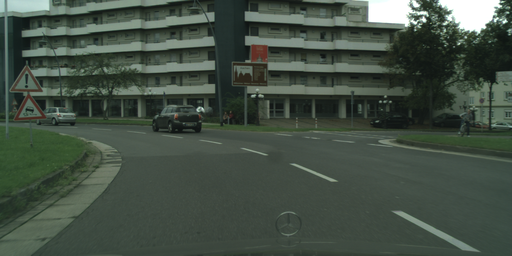

In [6]:
img

In [28]:
depth_path = '/media/hpc4_Raid/dsungatullina/transfer-to-zhores/Cityscapes/depth_512x256/train/aachen/aachen_000001_000019_disparity.png'
depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)

In [34]:
plt.figure(size=(10,10))
plt.imshow(depth)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'size'

In [30]:
depth.max()

255

In [31]:
depth.min()

0

In [35]:
disp_path = '/media/hpc4_Raid/dsungatullina/disparity/train/aachen/aachen_000005_000019_disparity.png'

In [38]:
disparity = cv2.imread(disp_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
disparity[disparity > 0] = (disparity[disparity > 0] - 1) / 256.0
depth = np.zeros(disparity.shape)
depth[disparity>0] = (0.209313 * 2262.52) / disparity[disparity>0]
depth = grey_closing(depth, size=(7,7))
depth_resized = cv2.resize(depth, (512, 256), interpolation=cv2.INTER_NEAREST) 

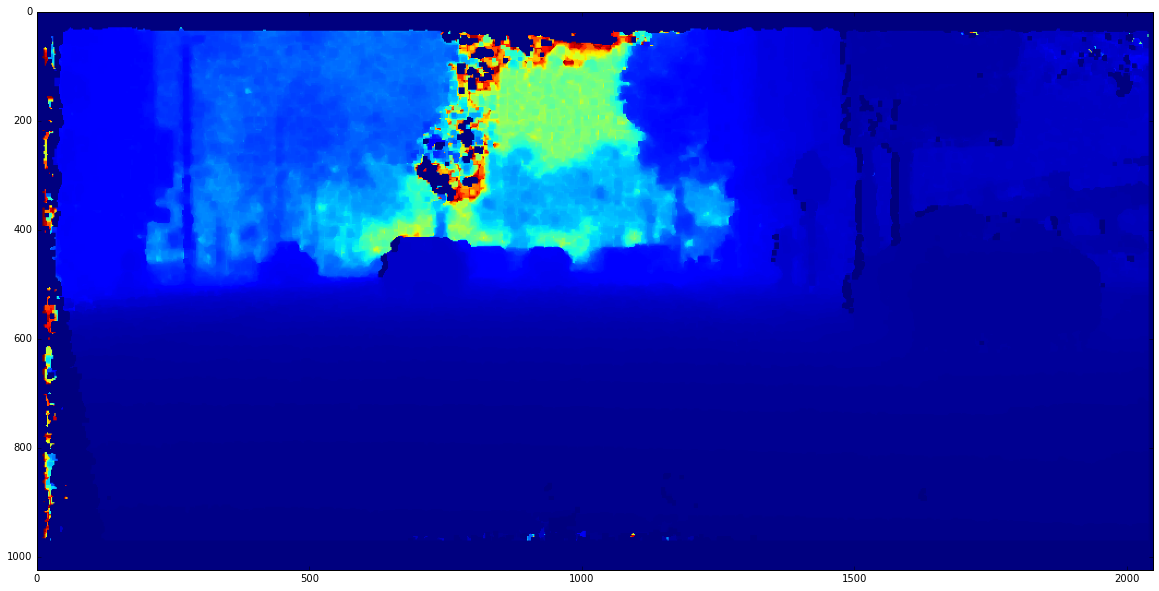

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(depth)
plt.show()

In [40]:
depth.shape

(1024, 2048)

In [41]:
depth.max()

473.5748596191406

In [42]:
depth.min()

0.0

In [43]:
depth_resized.max()

473.5748596191406

In [59]:
depth_resized.max()

473.5748596191406

In [60]:
depth_resized.min()

0.0

In [5]:
import sys
sys.executable

'/usr/bin/python'

In [6]:
from tifffile import imsave

ImportError: No module named tiffile

In [95]:
depth_resized.max()

473.5748596191406

In [96]:
cv2.imwrite('test_depth.tif', depth_resized)

True

In [97]:
test_depth_resized = cv2.imread('test_depth.tif', cv2.IMREAD_UNCHANGED)

In [98]:
test_depth_resized.max()

255

In [57]:
test_depth_resized.min()

0

In [58]:
test_depth_resized.shape

(256, 512)

In [9]:
test_depth_resized = cv2.imread('result.tif', cv2.IMREAD_UNCHANGED)

In [10]:
test_depth_resized.max()

473.5748596191406

In [12]:
test_depth_resized.mean()

41.464885556819354

In [13]:
test_depth_resized.shape

(256, 512)

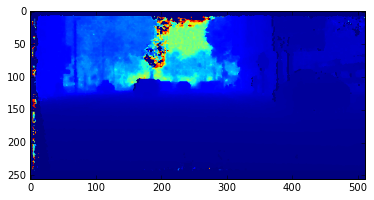

In [14]:
plt.imshow(test_depth_resized)
plt.show()

In [79]:
np.save('test_depth.npy', depth_resized.astype(np.uint16))  

In [80]:
d = np.load('test_depth.npy')

In [81]:
d.max()

473

In [82]:
d.min()

0

In [83]:
from scipy.misc import imsave

In [89]:
cv2.imwrite('test-2.png', depth_resized.astype(np.uint16))

True

In [90]:
test_depth_resized = cv2.imread('test-2.png', cv2.IMREAD_UNCHANGED)

In [91]:
test_depth_resized.max()

473

In [92]:
test_depth_resized.min()

0

In [74]:
np.all(depth_resized == d)

True

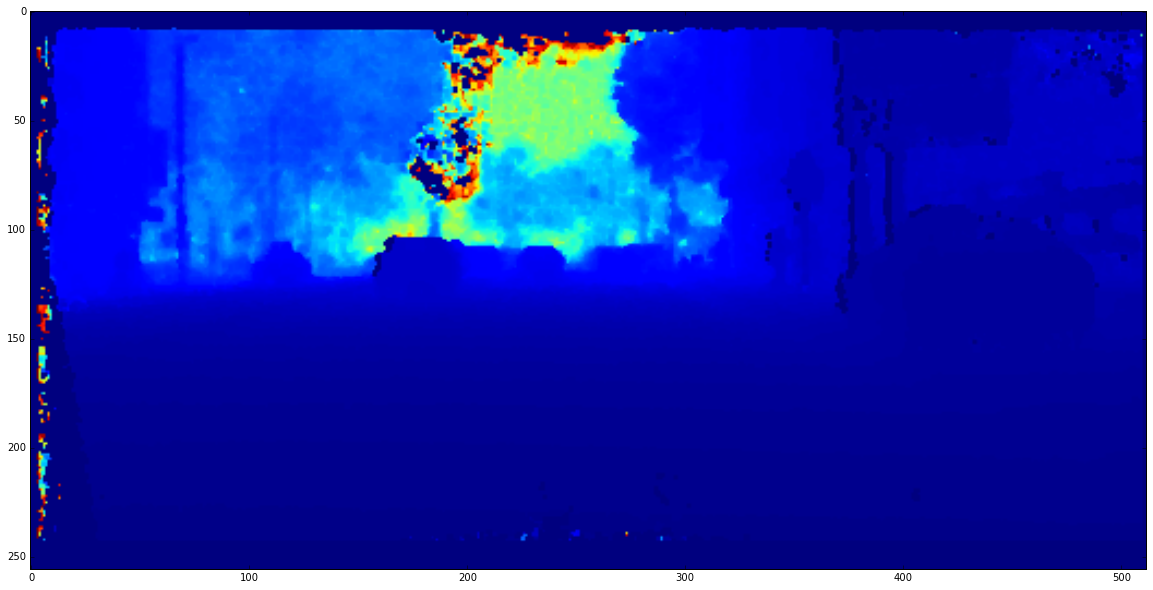

In [75]:
plt.figure(figsize=(20,20))
plt.imshow(depth_resized)
plt.show()

In [76]:
d.shape

(256, 512)

In [77]:
type(depth_resized)

numpy.ndarray

In [16]:
path = '/media/hpc4_Raid/dsungatullina/transfer-to-zhores/SYNTHIA/RAND_CITYSCAPES/Depth_512x256/train/0000000.tif'

In [17]:
test_depth_resized = cv2.imread(path, cv2.IMREAD_UNCHANGED)

In [24]:
plt.imshow(test_depth_resized)
plt.show()

TypeError: Image data can not convert to float

In [20]:
test_depth_resized.max()

AttributeError: 'NoneType' object has no attribute 'max'

In [4]:
filenames = glob.glob('/media/hpc-4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/*.png')
filenames.sort()
print(len(filenames))

8000


In [5]:
filenames[0]

'/media/hpc-4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/0000000.png'

In [6]:
depth = cv2.imread(filenames[0], cv2.IMREAD_UNCHANGED)
depth = depth[:, :, 0] / 100.0
#depth = np.round(depth)
#depth = depth.astype(np.uint16)
depth_resized = cv2.resize(depth, (512, 304), interpolation=cv2.INTER_NEAREST) 

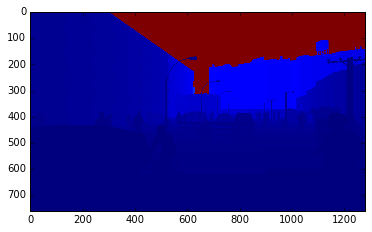

In [7]:
plt.imshow(depth)
plt.show()

In [23]:
depth = Image.open(filenames[0]).convert('L')

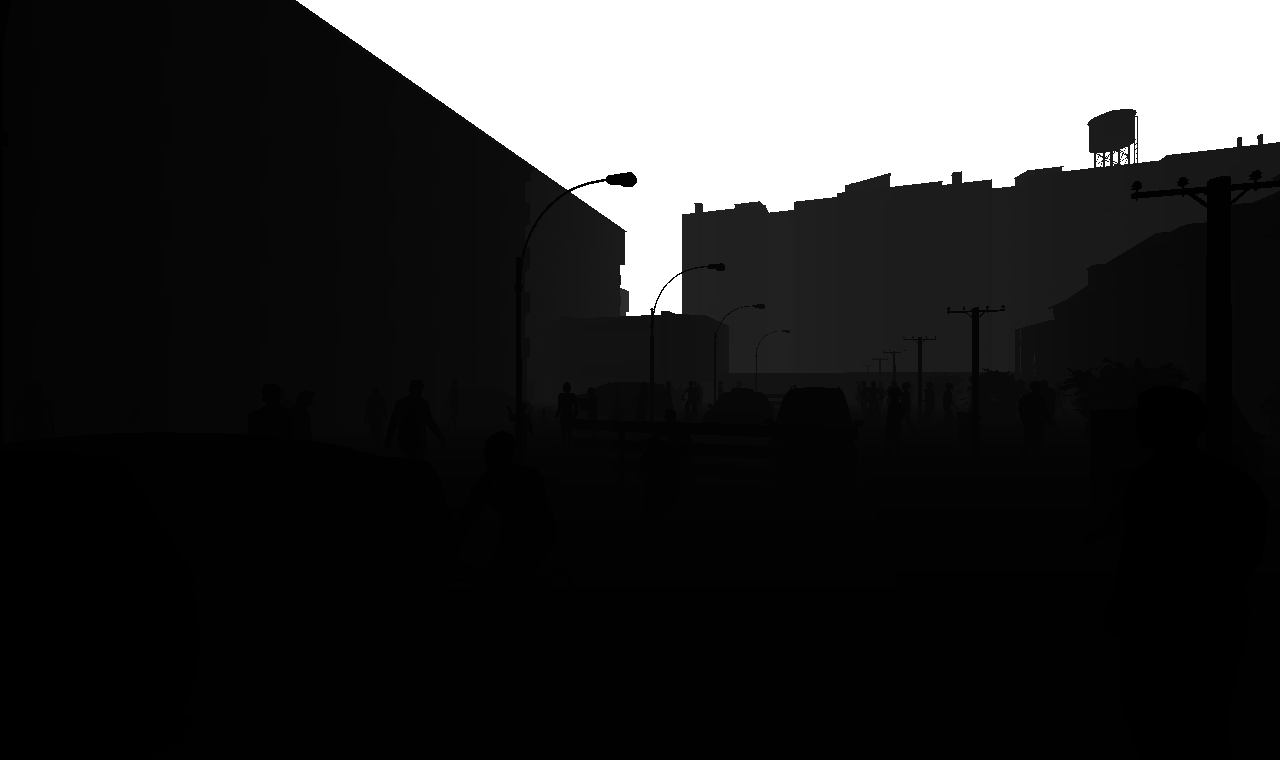

In [28]:
depth

In [25]:
ar_depth = np.array(depth)

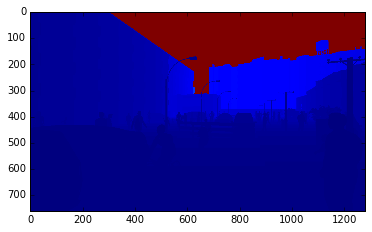

In [27]:
plt.imshow(ar_depth)
plt.show()

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
def pil_test():
    cm_hot = mpl.cm.get_cmap('hot')
    img_src = Image.open('test.jpg').convert('L')
    img_src.thumbnail((512,512))
    im = np.array(img_src)
    im = cm_hot(im)
    im = np.uint8(im * 255)
    im = Image.fromarray(im)
    im.save('test_hot.jpg')

In [30]:
cm_jet = mpl.cm.get_cmap('jet')

In [31]:
im = cm_jet(ar_depth)

In [32]:
im = np.uint8(im * 255)
im = Image.fromarray(im)

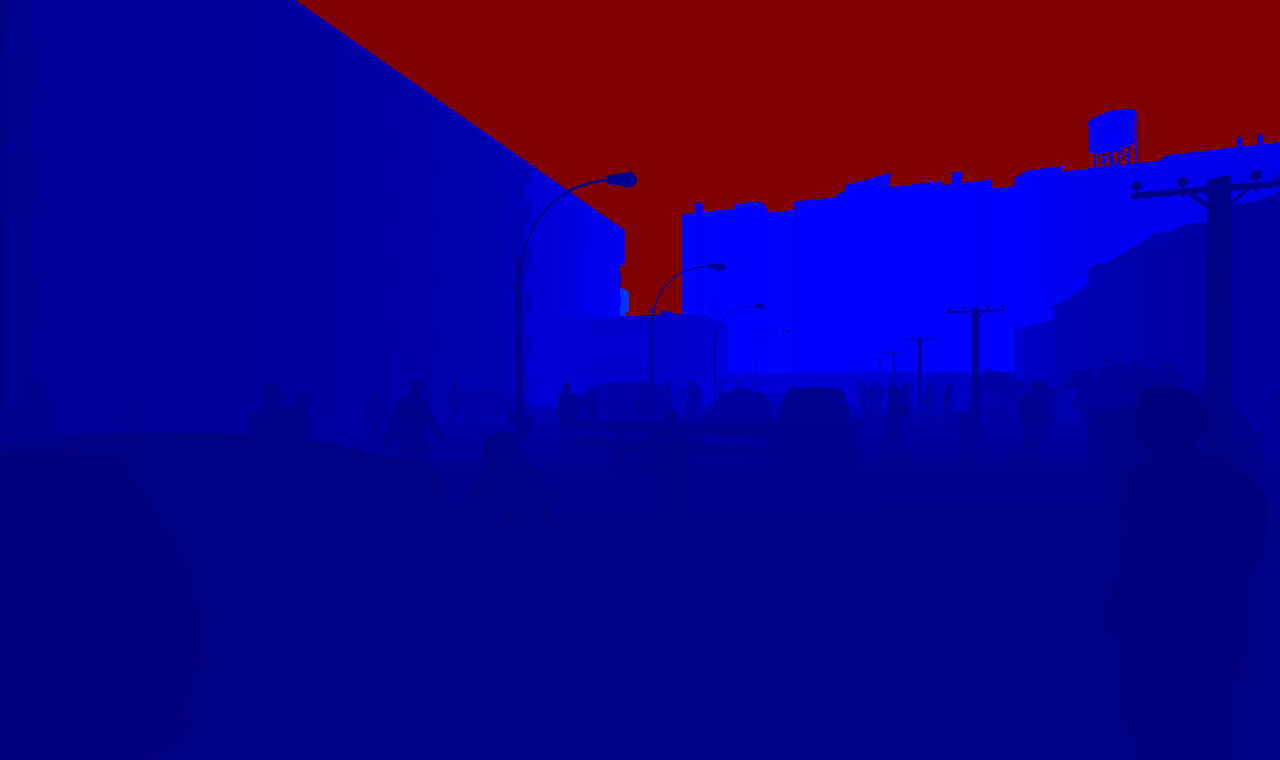

In [33]:
im

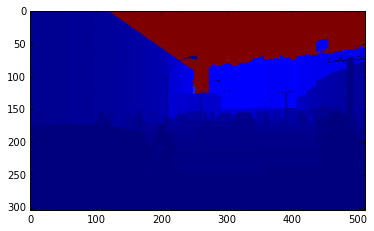

In [26]:
plt.imshow(depth_resized)
plt.show()

In [28]:
print(depth.min(), depth.mean(), depth.max())
print(depth_resized.min(), depth_resized.mean(), depth_resized.max())

(1.9, 122.47841240748353, 655.35)
(1.9, 123.06618151212993, 655.35)


In [ ]:
img_path = '/media/hpc4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/0000000.png'
depth = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
depth = depth[:, :, 0] / 100.0

In [48]:
test_depth = cv2.imread('/media/hpc4_Raid/dsungatullina/transfer-to-zhores/Cityscapes/depth_512x256/train/aachen/aachen_000000_000019_disparity.tif', cv2.IMREAD_UNCHANGED)

In [49]:
test_depth

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
test_depth.max()

473.5748596191406

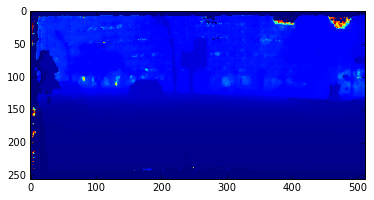

In [51]:
plt.imshow(test_depth)
plt.show()